**Load necessary modules**

In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import microscope as mcr
import matplotlib.pyplot as plt
import pandas as pd
import sample as sm
import ignore as ig

**Run scopes**

In [2]:
D, D_r = 3, 300
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 4e-5
L0, L1 = 0.4, 3.5

L63_data_folder = '../data/L63-trajectories'
train = np.load('{}/train.npy'.format(L63_data_folder))[:20000]
test = np.load('{}/test.npy'.format(L63_data_folder))[:100]
scope = mcr.MicroscopeExtremeToGood('../data/L63-microscope-saturated-to-good-300', D, D_r, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1)
# scope.run()

In [3]:
save_folder = '../data/L63-microscope-linear-to-good-{}'.format(D_r)
viewerl = mcr.MicroscopeLinearToGoodViewer(save_folder, 20)
save_folder = '../data/L63-microscope-saturated-to-good-{}'.format(D_r)
viewers = mcr.MicroscopeLinearToGoodViewer(save_folder, 20)
# viewerl.view1(limits=[-5., 5.])

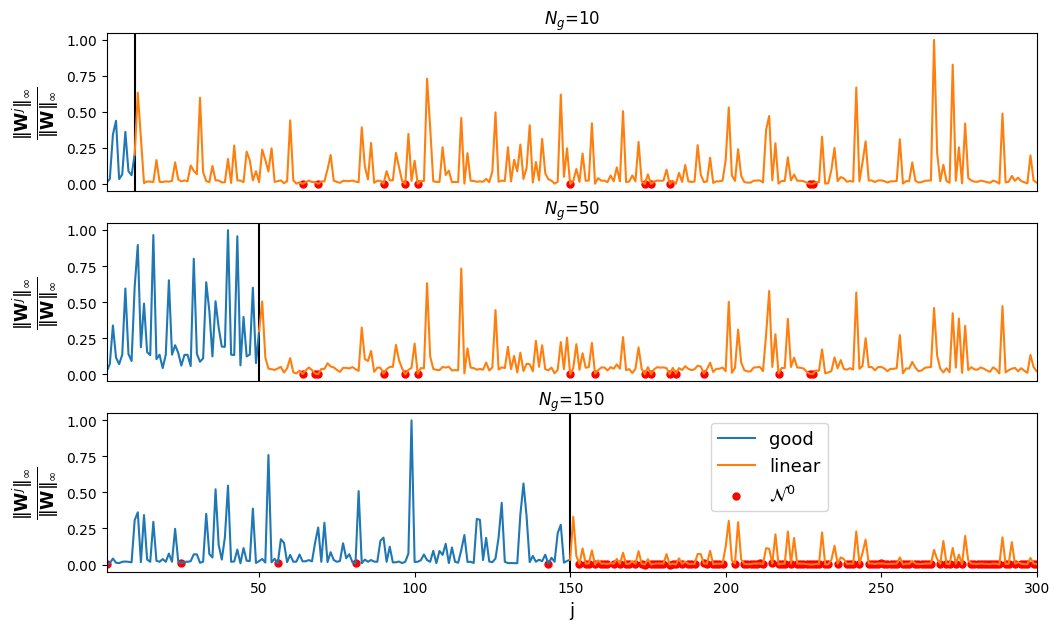

In [4]:
viewerl.plot5([10, 50, 150], u'#1f77b4', u'#ff7f0e', 'good', 'linear', [-1., 1.], file_path=f'../data/plots/l2g_10_50_150.png')

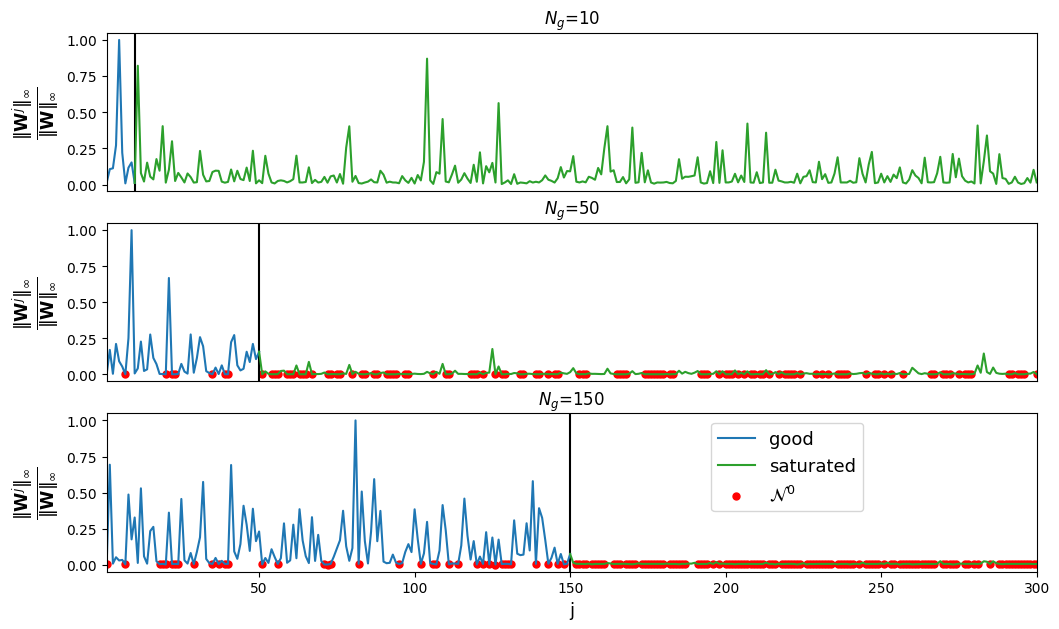

In [5]:
viewers.plot5([10, 50, 150], u'#1f77b4', u'#2ca02c', 'good', 'saturated', [-1., 1.], file_path=f'../data/plots/s2g_10_50_150.png')

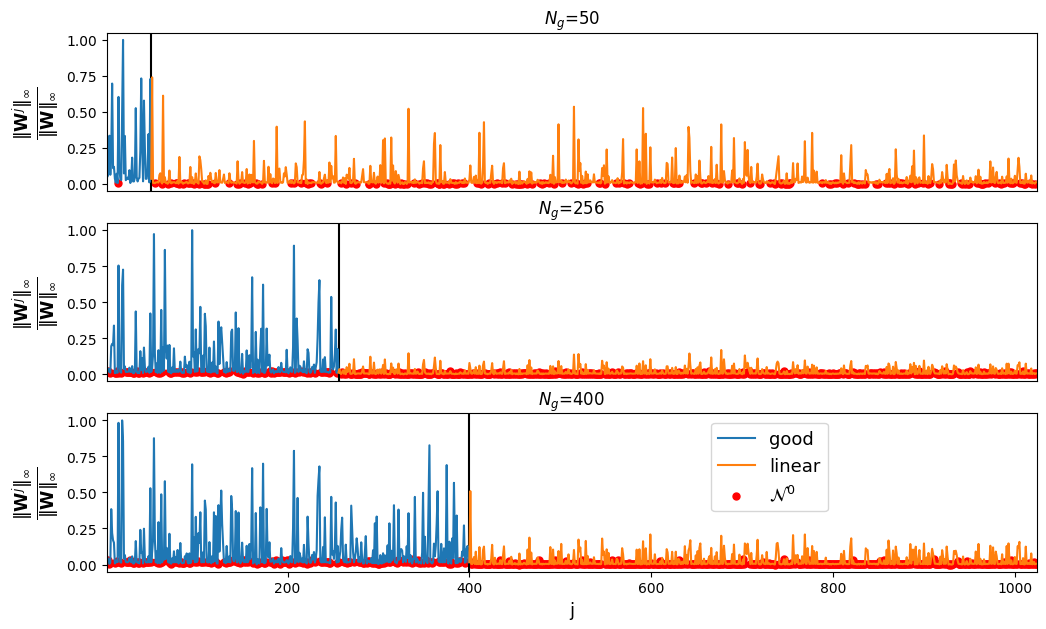

In [6]:
save_folder = '../data/L63-microscope-linear-to-good-{}'.format(1024)
viewerl1024 = mcr.MicroscopeLinearToGoodViewer(save_folder, 20)
k = [50, 256, 400]
viewerl1024.plot5(k, u'#1f77b4', u'#ff7f0e', 'good', 'linear', [-1., 1.], file_path=f'../data/plots/l2g_{k[0]}_{k[1]}_{k[2]}-1024.png')

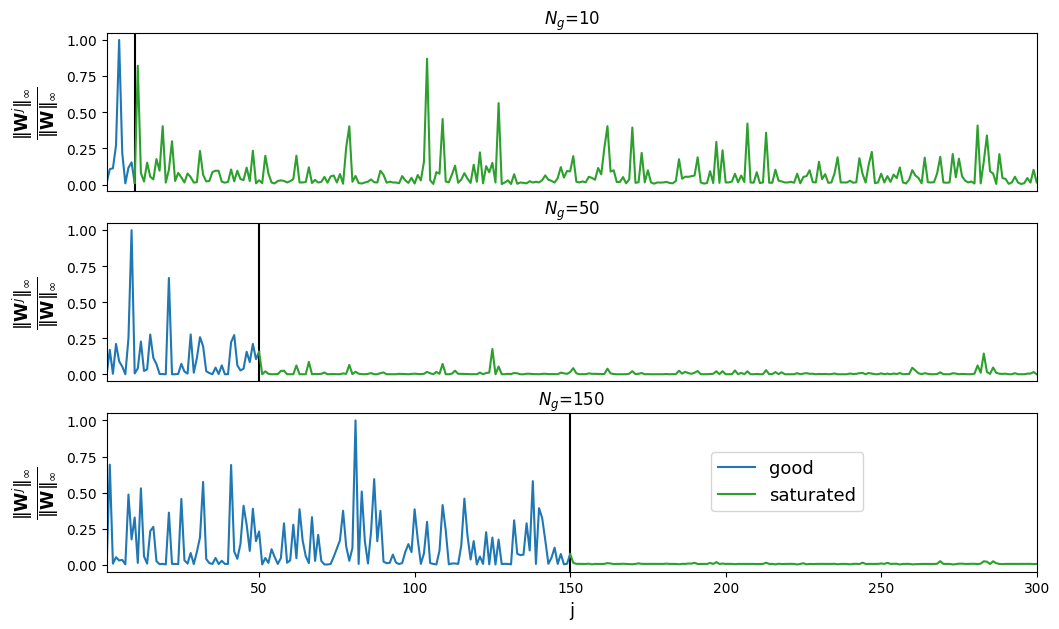

In [8]:
viewers.plot5([10, 50, 150], u'#1f77b4', u'#2ca02c', 'good', 'saturated', [0., 0.], file_path=f'../data/plots/s2g-jb.png', N0=False)